# Table of Contents
* [3x1 firesales](#3x1-firesales)
* [heatmap](#heatmap)
* [make tree chart](#make-tree-chart)
* [load data](#load-data)
* [transform table](#transform-table)
* [plotting](#plotting)
* [all in one](#all-in-one)
* [second list of shocks](#second-list-of-shocks)


In [7]:
keys 

array([-0.5 , -0.4 , -0.3 , -0.25, -0.2 , -0.1 , -0.04])

[-0.3 -0.2 -0.1]


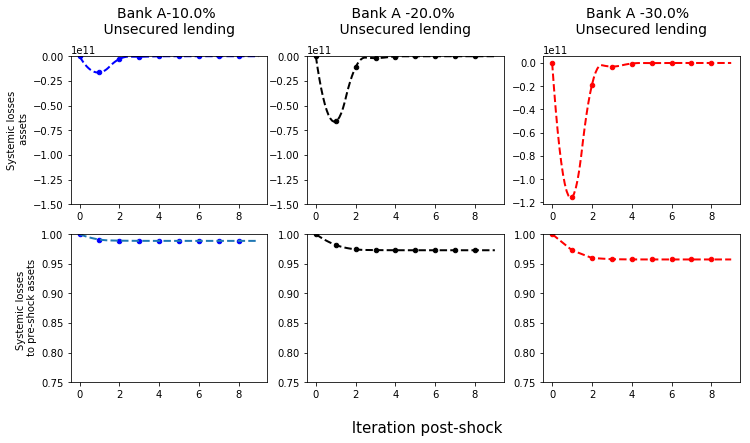

In [31]:
path_sys='/Users/admin/git_repos/BlackRhino/examples/firesale2020/experiments/single_bank/output/2020-2/all_SYSTEM.csv'
#run the whole thing
import numpy as np
import pandas as pd
import csv
from matplotlib import cm
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import numpy
from numpy.random import randn
from scipy import array, newaxis
import seaborn as sns
from matplotlib.patches import Rectangle
from scipy.interpolate import InterpolatedUnivariateSpline

import os
import pandas as pd

df=pd.read_csv(path_sys) 
 
#####################
 #####################

 #####################
scenarios = [-0.1,-0.2,-0.3]
 
assets = ["m_16"]
df=df[df.asset==assets[0]]
df=df[df.shock.isin(scenarios)]
df=df.reset_index()
keys = np.unique(df['shock'])
print(keys)#####################
#####################
 #####################

for key in keys:
    if key == scenarios[0]:
        I1 = np.argwhere(df['shock']==key).squeeze()
    if key == scenarios[1]:
        I2 = np.argwhere(df['shock']==key).squeeze()
    if key == scenarios[2]:
        I3 = np.argwhere(df['shock']==key).squeeze()

# #Make x values
x1 = np.array(df['current_step'][I1])
x1new = np.linspace(0, len(x1), num=100)
x2 = np.array(df['current_step'][I2])
x2new = np.linspace(0, len(x1), num=100)
x3 = np.array(df['current_step'][I3])
x3new = np.linspace(0, len(x3), num=100)
 
#Make y values
y1 = df['system_TAS'][I1] 
y2 = df['system_TAS'][I2] 
y3 = df['system_TAS'][I3] 
#Smoothing system TAs
f1 = InterpolatedUnivariateSpline(x1, y1 , k=2)
f2 = InterpolatedUnivariateSpline(x2, y2 , k=2)
f3 = InterpolatedUnivariateSpline(x3, y3 , k=2)

r1 = f1(x1new)
#r1[r1 > 1] = 0
r2 = f2(x2new)
r2[r2 > 0.1] = 0
r3 = f3(x3new)
r3[r3 > 0.1] = 0


y4 = df['assets_to_pre_shock'][I1] 
y5 = df['assets_to_pre_shock'][I2] 
y6 = df['assets_to_pre_shock'][I3] 

#-10
f4 = InterpolatedUnivariateSpline(x1, y4 , k=2)
r4 = f4(x1new)

f5 = InterpolatedUnivariateSpline(x2, y5 , k=2)
r5 = f5(x2new)
f6 = InterpolatedUnivariateSpline(x3, y6 , k=1)
r6 = f6(x3new)
#fig,  ax  = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
fig, axes = plt.subplots(nrows=2, ncols=3,   figsize=(12,6))
#ax = ax1.twinx() # THIS IS for two axesin one chart, not needed
########## 10 % shocl
axes[0][0].plot(x1,y1,'o',  x1new,r1,'--', lw=2,  ms=4.5, color='B', label=str(scenarios[0]))
axes[0][0].set_title("Bank A"+ str(scenarios[0]*100) +"% \n Unsecured lending \n", fontsize=14)
axes[0][0].set_ylim(-1.5e11,0)

# axes[0][0].set_ylim(-1e11,0)
axes[1][0].plot(x2,y4,'bo',  x2new, r4, '--', lw=2,  ms=4.5, label="-20%")
axes[1][0].set_ylabel("Systemic losses \n to pre-shock assets")
axes[1][0].set_ylim(0.75,1)

##########
########## 20 % 
axes[0][1].plot(x2,y2,'bo',  x2new,r2,'--', lw=2, color="black", ms=4.5, label="-20%")
axes[0][1].set_title(" Bank A "+ str(scenarios[1] *100) +"%  \n Unsecured lending \n", fontsize=14)
axes[0][1].set_ylim(-1.5e11,0)
axes[1][1].plot(x2,y5,'bo',  x2new, r5, '--', lw=2, color="black",  ms=4.5, label=str(scenarios[1]))
axes[1][1].set_ylim(0.75,1)

##########  
########## 50 % 
axes[0][2].plot(x3,y3,'o',  x3new,r3,'--', lw=2,  ms=4.5, color='red', label=str(scenarios[2]))
axes[0][2].set_title("Bank A "+ str(scenarios[2]*100) +"%  \n Unsecured lending \n", fontsize=14)

axes[1][2].plot(x3,y6,'o',  x3new,r6,'--', lw=2,  ms=4.5, color='red', label="-50%")
axes[1][2].set_ylim(0.75,1)

xaxis_label = plt.xlabel('\n Iteration post-shock', fontsize=15)
xaxis_label.set_position((-0.6,3)) 

##########  
axes[0][0].set_ylabel("Systemic losses\n assets") #, fontsize=15

fig.savefig('fig_one_bank_sales_'+str(scenarios[-1]*100)+'.png', format='png', dpi=1000)


# anonymous heat map

([' FNB', ' CHARTERED', ' STANDARDBANK', ' CAPITEC', ' ABSA', ' ChinaConstruction', ' NEDBANK', ' AfricanB', ' JPM', ' CITYBANK', ' INVESTEC', ' HSBC'], 12)
12


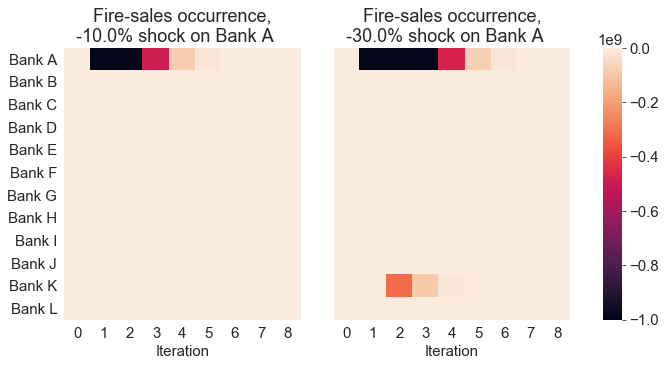

In [80]:
 
path_sys='/Users/admin/git_repos/BlackRhino/examples/firesale2020/experiments/single_bank/output/2020-2/all_AGENTS.csv'
agents=pd.read_csv(path_sys) 

 
assetclass = "m_16"
scenarios = [-0.1,-0.3]
 
import os
import pandas as pd
agents=agents.drop_duplicates()
agents=agents[agents.asset==assetclass]        
            
df=agents.filter(like='total_asset_sales') 
step=agents.filter(like='current_step')
shock=agents.shock
heat=pd.concat([df,step,shock],axis=1)
# print(heat)

heat.drop_duplicates()
heat = heat.drop('current_step.1', 1)
heat = heat.drop('current_step.2', 1)
heat = heat.drop('current_step.3', 1)
heat = heat.drop('current_step.4', 1)
heat = heat.drop('current_step.5', 1)
heat = heat.drop('current_step.6', 1)
heat = heat.drop('current_step.7', 1)
heat = heat.drop('current_step.8', 1)
heat = heat.drop('current_step.9', 1)
heat = heat.drop('current_step.10', 1)
heat = heat.drop('current_step.11', 1)
heat.columns

# # heat=heat[heat.columns[:-9]]

# # CHOOSE SHOCK
heat10=heat[heat.shock==scenarios[0]]
heat10 = heat10.drop('shock', 1)
t=heat10.T
t['Bank']=t.index

def dfreplace(df, *args, **kwargs):
    s = pd.Series(df.values.flatten())
    s = s.str.replace(*args, **kwargs)
    return s

temp = pd.melt(heat10, id_vars=[ 'current_step'])
series=dfreplace(pd.melt(heat10, id_vars=[ 'current_step'], ).variable, 'total_asset_sales' ,"")
temp['bank']=series
temp.columns = ['iteration','old', 'TAS', 'bank']
temp10=temp


##########################
# ##########################
##########################
heat50=heat[heat.shock==scenarios[-1]]
heat50 = heat50.drop('shock', 1)
heat50.columns, heat10.columns


# t=heat50.T
# t['Bank']=t.index

temp = pd.melt(heat50, id_vars=[ 'current_step'])
series=dfreplace(pd.melt(heat50, id_vars=[ 'current_step'], ).variable, 'total_asset_sales' ,"")
temp['bank']=series
temp.columns = ['iteration','old', 'TAS', 'bank']
temp50=temp


# #make bank anonymous
keys=temp10.bank.unique().tolist()

#order is important!!!

print(keys, len(keys))
# STANDARDBANK 	A
# ABSA	B
# FNB	C
# NEDBANK	D
# INVESTEC	E
# CAPITEC	F
# CITYBANK	G
# HSBC	H
# CHARTERED	I
# AfricanB	J
# JPM - K 
# chinaConstr - L 

values=['Bank C', 'Bank I', "Bank A","Bank F","Bank B","Bank L","Bank D","Bank J", "Bank K","Bank G","Bank E", "Bank H"]
print(len(values))
new_dict = dict(zip(keys, values))
temp50['bank'] = temp50['bank'].map(new_dict)
temp10['bank'] = temp10['bank'].map(new_dict)

import seaborn  as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
#plt.rc('font',**{'family':'sans-serif','sans-serif':['Times New Roman']})
sns.set_style("white")

## plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 15
### #plt.rcParams['axes.labelweight'] = 'bold'
### plt.rcParams['xtick.labelsize'] = 15
### plt.rcParams['ytick.labelsize'] = 15
### plt.rcParams['legend.fontsize'] = 15
### plt.rcParams['figure.titlesize'] = 16

### mpl.rcParams.update({'font.size': 10, 'font.family':'serif'})

cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
cmap1 = sns.diverging_palette(10, 220, sep=80, n=7)

tas_bonds_10 = temp10

tas_bonds_10 
result10 = tas_bonds_10.pivot(index="bank",columns="iteration", values="TAS")

tas_50 =  temp50
result50 = tas_50.pivot(index="bank",columns="iteration", values="TAS")



fig2,(ax1,ax2, axcb) = plt.subplots(1,3, figsize=(10,5),
            gridspec_kw={'width_ratios':[1,1,0.08]})

ax1.get_shared_y_axes().join(ax1,ax2)

#for reverse: "YlGnBu_r"
# center=result_equity_bond_10.loc["ABSA", 4]
g3 = sns.heatmap(result10, vmin=-1e9, vmax=0,cbar=False,ax=ax1)
g3.set_ylabel('')
g3.set_xlabel('Iteration')
g3.set_title('Fire-sales occurrence,\n '+ str(scenarios[0]*100)  +'% shock on Bank A    ')
 
g4 = sns.heatmap(result50, vmin=-1e9, vmax=0,ax=ax2, cbar_ax=axcb)
g4.set_ylabel('')
g4.set_xlabel('Iteration')
g4.set_yticks([])
g4.set_title('Fire-sales occurrence,\n '+ str(scenarios[-1]*100)  +'% shock on Bank A    ')
fig2.savefig('fig_heat_one_bank_non_maketableasset'+str(scenarios[-1]*100)+'.png', format='png', dpi=1000)


plt.show()

In [67]:
#make bank anonymous
keys=temp10.bank.unique().tolist()

#order is important!!!

print(keys, len(keys))
# STANDARDBANK 	A
# ABSA	B
# FNB	C
# NEDBANK	D
# INVESTEC	E
# CAPITEC	F
# CITYBANK	G
# HSBC	H
# CHARTERED	I
# AfricanB	J
# JPM - K 
# chinaConstr - L 

values=['Bank C', 'Bank I', "Bank A","Bank F","Bank B","Bank L","Bank D","Bank J", "Bank K","Bank G","Bank E", "Bank H"]
print(len(values))
new_dict = dict(zip(keys, values))
temp50['bank'] = temp50['bank'].map(new_dict)
temp10['bank'] = temp10['bank'].map(new_dict)
  
    

([' FNB', ' CHARTERED', ' STANDARDBANK', ' CAPITEC', ' ABSA', ' ChinaConstruction', ' NEDBANK', ' AfricanB', ' JPM', ' CITYBANK', ' INVESTEC', ' HSBC'], 12)
12


# 3x1 firesales

[-0.5 -0.2 -0.1]


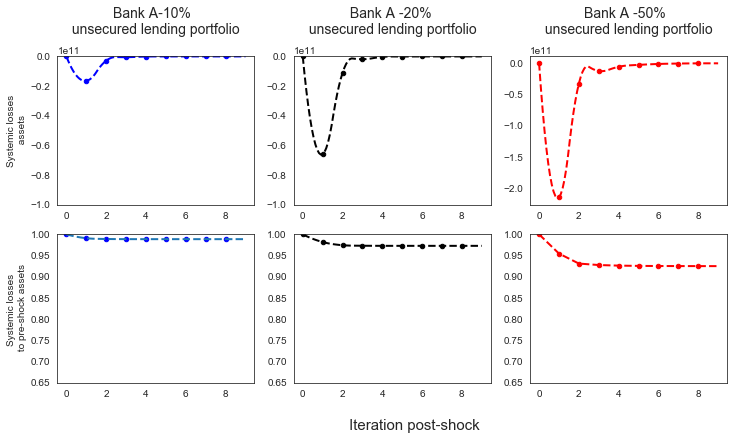

In [3]:
#run the whole thing
import numpy as np
import pandas as pd
import csv
from matplotlib import cm
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import numpy
from numpy.random import randn
from scipy import array, newaxis
import seaborn as sns
from matplotlib.patches import Rectangle
from scipy.interpolate import InterpolatedUnivariateSpline

import os
import pandas as pd

assets = ["m_15",'m_16' ]

 

p=os.getcwd()+'/output/m_16/2020-2/'
for dir, sub, files in os.walk(p):
    for f in files:
        if 'AGENT' in f and 'last' not in f:
            agents=pd.read_csv(str(dir)+'/'+f)
            
        if 'SYSTEM' in f and 'last' not in f:
            system=pd.read_csv(str(dir)+'/'+f)     
df=system 

#be careful with the bank string!

sbsa=agents.filter(like='STANDARD') 
specs=agents[agents.columns[-5:]]
stressedbank=pd.concat([sbsa,specs],axis=1)
# stressedbank.columns 
stressedbank['assets_to_pre_shock'] = stressedbank['total_assets STANDARDBANK']/  stressedbank['total_assets STANDARDBANK'][0]

sns.set_style("white")

#Only Standard bank! 
#plt.rc('font',**{'family':'sans-serif','sans-serif':['Times New Roman']})

keys = np.unique(df['shock'])

print keys
for key in keys:
    if key == -0.1:
        I1 = np.argwhere(df['shock']==key).squeeze()
    if key == -0.2:
        I2 = np.argwhere(df['shock']==key).squeeze()
    if key == -0.5:
        I3 = np.argwhere(df['shock']==key).squeeze()

#Make x values
x1 = np.array(df['current_step'][I1])
x1new = np.linspace(0, len(x1), num=100)
x2 = np.array(df['current_step'][I2])
x2new = np.linspace(0, len(x1), num=100)
x3 = np.array(df['current_step'][I3])
x3new = np.linspace(0, len(x3), num=100)
 
#Make y values
y1 = df['system_TAS'][I1] 
y2 = df['system_TAS'][I2] 
y3 = df['system_TAS'][I3] 
#Smoothing system TAs
f1 = InterpolatedUnivariateSpline(x1, y1 , k=2)
f2 = InterpolatedUnivariateSpline(x2, y2 , k=2)
f3 = InterpolatedUnivariateSpline(x3, y3 , k=2)

r1 = f1(x1new)
#r1[r1 > 1] = 0
r2 = f2(x2new)
r2[r2 > 0.1] = 0
r3 = f3(x3new)
r3[r3 > 0.1] = 0


y4 = df['assets_to_pre_shock'][I1] 
y5 = df['assets_to_pre_shock'][I2] 
y6 = df['assets_to_pre_shock'][I3] 

#-10
f4 = InterpolatedUnivariateSpline(x1, y4 , k=2)
r4 = f4(x1new)

f5 = InterpolatedUnivariateSpline(x2, y5 , k=2)
r5 = f5(x2new)
f6 = InterpolatedUnivariateSpline(x3, y6 , k=1)
r6 = f6(x3new)
#fig,  ax  = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
fig, axes = plt.subplots(nrows=2, ncols=3,   figsize=(12,6))
#ax = ax1.twinx() # THIS IS for two axesin one chart, not needed
########## 10 % shocl
axes[0][0].plot(x1,y1,'o',  x1new,r1,'--', lw=2,  ms=4.5, color='B', label="-10%")
axes[0][0].set_title("Bank A-10%  \n unsecured lending portfolio \n", fontsize=14)
axes[0][0].set_ylim(-1e11,0)
axes[1][0].plot(x2,y4,'bo',  x2new, r4, '--', lw=2,  ms=4.5, label="-20%")
axes[1][0].set_ylabel("Systemic losses \n to pre-shock assets")
axes[1][0].set_ylim(0.65,1)


##########
########## 20 % 
axes[0][1].plot(x2,y2,'bo',  x2new,r2,'--', lw=2, color="black", ms=4.5, label="-20%")
axes[0][1].set_title(" Bank A -20%  \n unsecured lending portfolio \n", fontsize=14)
axes[1][1].plot(x2,y5,'bo',  x2new, r5, '--', lw=2, color="black",  ms=4.5, label="-20%")
axes[1][1].set_ylim(0.65,1)
axes[0][1].set_ylim(-1e11,0)
##########  
########## 50 % 
axes[0][2].plot(x3,y3,'o',  x3new,r3,'--', lw=2,  ms=4.5, color='red', label="-50%")
axes[0][2].set_title("Bank A -50%  \n unsecured lending portfolio \n", fontsize=14)

axes[1][2].plot(x3,y6,'o',  x3new,r6,'--', lw=2,  ms=4.5, color='red', label="-50%")
axes[1][2].set_ylim(0.65,1)

xaxis_label = plt.xlabel('\n Iteration post-shock', fontsize=15)
xaxis_label.set_position((-0.6,3)) 

##########  
axes[0][0].set_ylabel("Systemic losses\n assets") #, fontsize=15
#fig.savefig('sbsa.pdf', format="pdf") #bbox_inches='tight'
 

plt.show()

# heatmap

Index([u'total_asset_sales FNB', u'total_asset_sales CHARTERED',
       u'total_asset_sales STANDARDBANK', u'total_asset_sales CAPITEC',
       u'total_asset_sales ABSA', u'total_asset_sales ChinaConstruction',
       u'total_asset_sales NEDBANK', u'total_asset_sales AfricanB',
       u'total_asset_sales JPM', u'total_asset_sales CITYBANK',
       u'total_asset_sales INVESTEC', u'total_asset_sales HSBC',
       u'current_step', u'current_step.1', u'current_step.2',
       u'current_step.3', u'current_step.4', u'current_step.5',
       u'current_step.6', u'current_step.7', u'current_step.8',
       u'current_step.9', u'current_step.10', u'current_step.11', u'shock'],
      dtype='object')


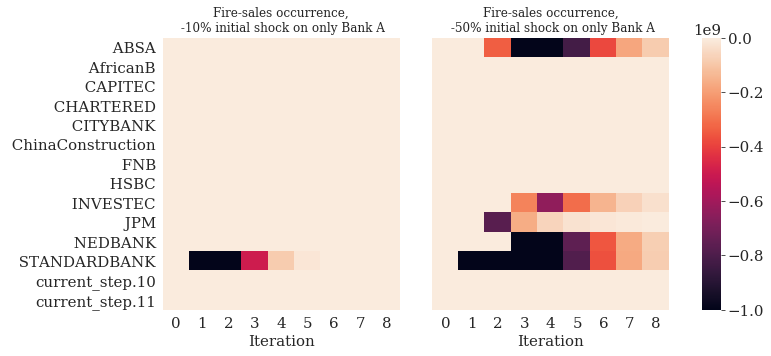

In [243]:
# Make heatmap  
assetclass = 'm_16'

import os
import pandas as pd
p=os.getcwd()+'/output/'
for dir, sub, files in os.walk(p):
    for f in files:
        if 'AGENT' in f and 'last' not in f:
            agents=pd.read_csv(str(dir)+'/'+f)
            
        if 'SYSTEM' in f and 'last' not in f:
            system=pd.read_csv(str(dir)+'/'+f)     

agents=agents[agents.asset==assetclass]        
            
df=agents.filter(like='total_asset_sales') 
step=agents.filter(like='current_step')
shock=agents.shock
heat=pd.concat([df,step,shock],axis=1)
print(heat.columns)
heat = heat.drop('current_step.1', 1)
heat = heat.drop('current_step.2', 1)
heat = heat.drop('current_step.3', 1)
heat = heat.drop('current_step.4', 1)
heat = heat.drop('current_step.5', 1)
heat = heat.drop('current_step.6', 1)
heat = heat.drop('current_step.7', 1)
heat = heat.drop('current_step.8', 1)
heat = heat.drop('current_step.9', 1)

# heat=heat[heat.columns[:-9]]

# CHOOSE SHOCK
heat10=heat[heat.shock==-0.1]
heat10 = heat10.drop('shock', 1)
t=heat10.T
t['Bank']=t.index

def dfreplace(df, *args, **kwargs):
    s = pd.Series(df.values.flatten())
    s = s.str.replace(*args, **kwargs)
    return s

temp = pd.melt(heat10, id_vars=[ 'current_step'])
series=dfreplace(pd.melt(heat10, id_vars=[ 'current_step'], ).variable, 'total_asset_sales' ,"")
temp['bank']=series
temp.columns = ['iteration','old', 'TAS', 'bank']
temp10=temp

##########################
##########################
##########################
heat50=heat[heat.shock==-0.5]
heat50 = heat50.drop('shock', 1)
t=heat50.T
t['Bank']=t.index

temp = pd.melt(heat50, id_vars=[ 'current_step'])
series=dfreplace(pd.melt(heat50, id_vars=[ 'current_step'], ).variable, 'total_asset_sales' ,"")
temp['bank']=series
temp.columns = ['iteration','old', 'TAS', 'bank']
temp50=temp
import seaborn  as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
#plt.rc('font',**{'family':'sans-serif','sans-serif':['Times New Roman']})
sns.set_style("white")

plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 15
#plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['figure.titlesize'] = 16

mpl.rcParams.update({'font.size': 10, 'font.family':'serif'})

cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
cmap1 = sns.diverging_palette(10, 220, sep=80, n=7)

tas_bonds_10 = temp10

tas_bonds_10 
result10 = tas_bonds_10.pivot(index="bank",columns="iteration", values="TAS")

tas_50 =  temp50
result50 = tas_50.pivot(index="bank",columns="iteration", values="TAS")


fig2,(ax1,ax2, axcb) = plt.subplots(1,3, figsize=(10,5),
            gridspec_kw={'width_ratios':[1,1,0.08]})

ax1.get_shared_y_axes().join(ax1,ax2)

#for reverse: "YlGnBu_r"
# center=result_equity_bond_10.loc["ABSA", 4]
g3 = sns.heatmap(result10, vmin=-1e9, vmax=0,cbar=False,ax=ax1)
g3.set_ylabel('')
g3.set_xlabel('Iteration')
g3.set_title('Fire-sales occurrence,\n -10% initial shock on only Bank A')
 
g4 = sns.heatmap(result50, vmin=-1e9, vmax=0,ax=ax2, cbar_ax=axcb)
g4.set_ylabel('')
g4.set_xlabel('Iteration')
g4.set_yticks([])
g4.set_title('Fire-sales occurrence,\n -50% initial shock on only Bank A')
# fig2.savefig('fig3.png', format='png', dpi=1000)


plt.show()

# make tree chart

# load data

In [67]:
import os
import pandas as pd
 
 
results2_system = []
results2_agents = []
temp=[]
p=os.getcwd()+'/output/2020-2/' 
for dir, sub, files in os.walk(p):
    for f in files:
        if 'all_AGENTS.csv' in f and '0.5' not in f:
            agents=pd.read_csv(str(dir)+'/'+f)
        if 'all_SYSTEM' in f and '0.5' not in f:
            system=pd.read_csv(str(dir)+'/'+f)  
#be careful with the bank string!
sbsa=agents.filter(like='STANDARD')  
specs=agents[agents.columns[-5:]] # CAREFUL WITH THE ORDER OF THE COLUMNS 
stressedbank=pd.concat([sbsa,specs],axis=1)
stressedbank['assets_to_pre_shock'] = stressedbank['total_assets STANDARDBANK']/  stressedbank['total_assets STANDARDBANK'][0]
stressedbank['equity_to_pre_shock'] = stressedbank['equity STANDARDBANK']/  stressedbank['equity STANDARDBANK'][0]

shocks = [-0.1, -0.5]
assets = ['m_2','m_3',"m_4","m_5","m_6","m_7","m_8",
                'm_9','m_10',"m_11","m_12","m_13","m_14","m_15" ,'m_16',
                'm_17', ]
 
temp=[]
helper = {}
for s in shocks:
    for a in assets:
        df=stressedbank[(stressedbank.shock==s)&(stressedbank.asset==a)]
        helper['time']=df.time.values[0]
        helper['bank'] = 'STANDARDBANK'
        helper['asset'] = a
        helper['shock'] = s
        helper['losses'] = df['equity_to_pre_shock'].values[-1] 
        d=pd.DataFrame(helper , index=[a])
        temp.append(d)
        print(a,s)
#         temp.append(d)
s=pd.concat(temp) 

('m_2', -0.1)
('m_3', -0.1)
('m_4', -0.1)
('m_5', -0.1)
('m_6', -0.1)
('m_7', -0.1)
('m_8', -0.1)
('m_9', -0.1)
('m_10', -0.1)
('m_11', -0.1)
('m_12', -0.1)
('m_13', -0.1)
('m_14', -0.1)
('m_15', -0.1)
('m_16', -0.1)
('m_17', -0.1)
('m_2', -0.5)
('m_3', -0.5)
('m_4', -0.5)
('m_5', -0.5)
('m_6', -0.5)
('m_7', -0.5)
('m_8', -0.5)
('m_9', -0.5)
('m_10', -0.5)
('m_11', -0.5)
('m_12', -0.5)
('m_13', -0.5)
('m_14', -0.5)
('m_15', -0.5)
('m_16', -0.5)
('m_17', -0.5)


# transform table

In [117]:
t=s[['asset','losses','shock']]

r = t.pivot_table('losses', ['asset'], 'shock')
# pd.melt(df, id_vars=['A'], value_vars=['B', 'C'])
 

# df=r.reindex_axis(['-0.5', '-0.1'], axis=1)

df=r.reset_index()
df

old_labels = ['m_2','m_3',"m_4","m_5","m_6","m_7","m_8",
                'm_9','m_10',"m_11","m_12","m_13","m_14","m_15" ,'m_16',
                'm_17', ]
 
    
new_labels=["SA Interbank deposits", "Rand Deposits with and loans to foreign banks",
            "Loans granted under repo agreement",
            "Foreign currency loans and advances",
            "Redeemable preference shares",
            "Corporate instalment credit",
            "Household instalment credit ",
            "Corporate mortgage credit",
            "Household mortgage",
            "Corporate_credit_card",
            "Household_credit_card",
            "Corporate_leasing",
            "Household_leasing",
            "Corporate_unsecured_lending",
            "Household_unsecured_lending",
           "Other_credit"]
new_dict = dict(zip(old_labels, new_labels))

df['asset'] = df['asset'].map(new_dict)
df

shock,asset,-0.5,-0.1
0,Household mortgage,0.000000,0.630086
1,Corporate_credit_card,0.989688,0.997938
2,Household_credit_card,0.826682,0.968707
3,Corporate_leasing,0.987008,0.997402
4,Household_leasing,0.999421,0.999884
5,Corporate_unsecured_lending,0.142048,0.811280
6,Household_unsecured_lending,0.786721,0.960613
7,Other_credit,0.645389,0.932050
8,SA Interbank deposits,0.984914,0.996983
9,Rand Deposits with and loans to foreign banks,0.949269,0.990750


# plotting

In [147]:
ordered = df.sort_values(by=-0.1) 
range_df=range(1,len(df.index)+1)
 
fig, ax=plt.subplots(figsize=(7,5))

plt.hlines(y=range_df, xmin=ordered[-0.1], xmax=ordered[-0.5], color='grey', alpha=0.4)
plt.scatter(ordered[-0.1], range_df, s=30,marker='o', color='black', alpha=1, label='-10%')
plt.scatter(ordered[-0.5], range_df,s=30, marker='^', color='grey', alpha=0.4 , label='-50%')
plt.legend()
plt.axvline( x=.80,  linewidth=0.4, color='r', linestyle='--') #ymin=0.025, ymax=0.075 ,

# Change only ax 
# scale_x = 1e6
# ticks_x = ticker.FuncFormatter(lambda x, pos: '${0:g}m$'.format(x/scale_x))
# ax.xaxis.set_major_formatter(ticks_x)

# Add title and axis names
plt.yticks(range_df, ordered['asset'])
plt.title("Comparison of equity losses Bank A,  -10% and -50% ", loc='left')
plt.xlabel('Equity to pre-shock ratio')
plt.ylabel('asset class')

KeyError: -0.1

In [82]:
shocks=np.linspace(-0.04, -0.4, num=10).tolist()
[round(num,2) for num in shocks]  

[-0.04, -0.08, -0.12, -0.16, -0.2, -0.24, -0.28, -0.32, -0.36, -0.4]

# all in one




Text(0,0.5,'asset class')

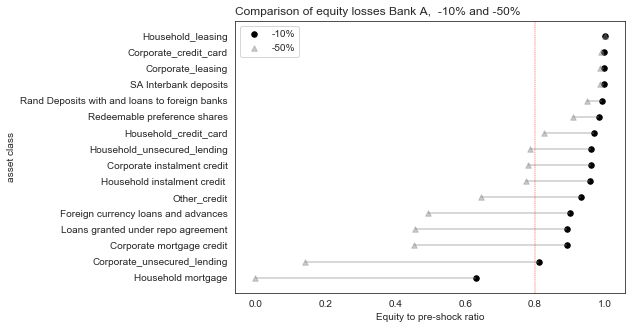

In [156]:
import os
import pandas as pd
 
results2_system = []
results2_agents = []
temp=[]
p=os.getcwd()+'/output/2020-2/' 
for dir, sub, files in os.walk(p):
    for f in files:
        if 'banks_bigshock' in f:
            agents=pd.read_csv(str(dir)+'/'+f)
#         if 'all_SYSTEM' in f and 'bigshock'   in f:
#             system=pd.read_csv(str(dir)+'/'+f)  
#be careful with the bank string!
sbsa=agents.filter(like='STANDARD')  
cur=agents.current_step
specs=agents[agents.columns[-5:]] # CAREFUL WITH THE ORDER OF THE COLUMNS 
sbsa_all=pd.concat([sbsa,specs,cur],axis=1)

#current step 0 !!!!!!!!??
stressedbank=sbsa_all[sbsa_all.current_step==0]
stressedbank['assets_to_pre_shock'] = stressedbank['total_assets STANDARDBANK']/  stressedbank['total_assets STANDARDBANK'][0]
stressedbank['equity_to_pre_shock'] = stressedbank['equity STANDARDBANK']/  stressedbank['equity STANDARDBANK'][0]

shocks = [-0.1, -0.5]
assets = ['m_2','m_3',"m_4","m_5","m_6","m_7","m_8", 'm_9','m_10',"m_11","m_12","m_13","m_14","m_15" ,'m_16','m_17', ]

temp=[]
helper = {} 
for s in shocks:
    for a in assets:
        try:
            df=stressedbank[(stressedbank.shock==s)&(stressedbank.asset==a)]
            helper['time']= df['time'].values[-1] 
            helper['bank'] = 'STANDARDBANK'
            helper['asset'] = a
            helper['shock'] = s
            helper['losses'] = df['equity_to_pre_shock'].values[-1] 
            d=pd.DataFrame(helper , index=[a])
            temp.append(d)
#             print(a,s)
        except:
            print(a,s)
#         temp.append(d)
s=pd.concat(temp) 
t=s[['asset','losses','shock']]
r = t.pivot_table('losses', ['asset'], 'shock')

df=r.reset_index()

old_labels = ['m_2','m_3',"m_4","m_5","m_6","m_7","m_8",
                'm_9','m_10',"m_11","m_12","m_13","m_14","m_15" ,'m_16',
                'm_17', ]
 
    
new_labels=["SA Interbank deposits", "Rand Deposits with and loans to foreign banks",
            "Loans granted under repo agreement",
            "Foreign currency loans and advances",
            "Redeemable preference shares",
            "Corporate instalment credit",
            "Household instalment credit ",
            "Corporate mortgage credit",
            "Household mortgage",
            "Corporate_credit_card",
            "Household_credit_card",
            "Corporate_leasing",
            "Household_leasing",
            "Corporate_unsecured_lending",
            "Household_unsecured_lending",
           "Other_credit"]
new_dict = dict(zip(old_labels, new_labels))

df['asset'] = df['asset'].map(new_dict)

ordered = df.sort_values(by=-0.1) 
range_df=range(1,len(df.index)+1)
 
fig, ax=plt.subplots(figsize=(7,5))

plt.hlines(y=range_df, xmin=ordered[-0.1], xmax=ordered[-0.5], color='grey', alpha=0.4)
plt.scatter(ordered[-0.1], range_df, s=30,marker='o', color='black', alpha=1, label='-10%')
plt.scatter(ordered[-0.5], range_df,s=30, marker='^', color='grey', alpha=0.4 , label='-50%')
plt.legend()
plt.axvline( x=.80,  linewidth=0.4, color='r', linestyle='--') #ymin=0.025, ymax=0.075 ,

# Change only ax 
# scale_x = 1e6
# ticks_x = ticker.FuncFormatter(lambda x, pos: '${0:g}m$'.format(x/scale_x))
# ax.xaxis.set_major_formatter(ticks_x)

# Add title and axis names
plt.yticks(range_df, ordered['asset'])
plt.title("Comparison of equity losses Bank A,  -10% and -50% ", loc='left')
plt.xlabel('Equity to pre-shock ratio')
plt.ylabel('asset class')

/Users/admin/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/admin/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0,0.5,'asset class')

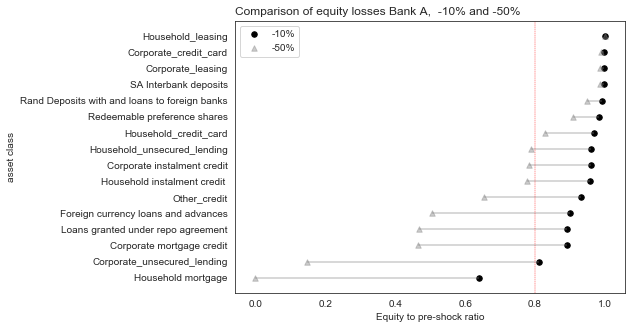

In [174]:
import os
import pandas as pd
 
results2_system = []
results2_agents = []
temp=[]
p=os.getcwd()+'/output/2020-2/' 
for dir, sub, files in os.walk(p):
    for f in files:
        if 'banks_bigshock' in f:
            agents=pd.read_csv(str(dir)+'/'+f)
#         if 'all_SYSTEM' in f and 'bigshock'   in f:
#             system=pd.read_csv(str(dir)+'/'+f)  
#be careful with the bank string!
sbsa=agents.filter(like='STANDARD')  
cur=agents.current_step
specs=agents[agents.columns[-5:]] # CAREFUL WITH THE ORDER OF THE COLUMNS 
sbsa_all=pd.concat([sbsa,specs,cur],axis=1)

#current step 0 !!!!!
stressedbank=sbsa_all[sbsa_all.current_step<=3]
stressedbank['assets_to_pre_shock'] = stressedbank['total_assets STANDARDBANK']/  stressedbank['total_assets STANDARDBANK'][0]
stressedbank['equity_to_pre_shock'] = stressedbank['equity STANDARDBANK']/  stressedbank['equity STANDARDBANK'][0]

shocks = [-0.1, -0.5]
assets = ['m_2','m_3',"m_4","m_5","m_6","m_7","m_8", 'm_9','m_10',"m_11","m_12","m_13","m_14","m_15" ,'m_16','m_17', ]

temp=[]
helper = {} 
for s in shocks:
    for a in assets:
        try:
            df=stressedbank[(stressedbank.shock==s)&(stressedbank.asset==a)]
            helper['time']= df['time'].values[-1] 
            helper['bank'] = 'STANDARDBANK'
            helper['asset'] = a
            helper['shock'] = s
            helper['losses'] = df['equity_to_pre_shock'].values[-1] 
            d=pd.DataFrame(helper , index=[a])
            temp.append(d)
#             print(a,s)
        except:
            print(a,s)
#         temp.append(d)
s=pd.concat(temp) 
t=s[['asset','losses','shock']]
r = t.pivot_table('losses', ['asset'], 'shock')

df=r.reset_index()

old_labels = ['m_2','m_3',"m_4","m_5","m_6","m_7","m_8",
                'm_9','m_10',"m_11","m_12","m_13","m_14","m_15" ,'m_16',
                'm_17', ]
 
    
new_labels=["SA Interbank deposits", "Rand Deposits with and loans to foreign banks",
            "Loans granted under repo agreement",
            "Foreign currency loans and advances",
            "Redeemable preference shares",
            "Corporate instalment credit",
            "Household instalment credit ",
            "Corporate mortgage credit",
            "Household mortgage",
            "Corporate_credit_card",
            "Household_credit_card",
            "Corporate_leasing",
            "Household_leasing",
            "Corporate_unsecured_lending",
            "Household_unsecured_lending",
           "Other_credit"]
new_dict = dict(zip(old_labels, new_labels))

df['asset'] = df['asset'].map(new_dict)

ordered = df.sort_values(by=-0.1) 
range_df=range(1,len(df.index)+1)
 
fig, ax=plt.subplots(figsize=(7,5))

plt.hlines(y=range_df, xmin=ordered[-0.1], xmax=ordered[-0.5], color='grey', alpha=0.4)
plt.scatter(ordered[-0.1], range_df, s=30,marker='o', color='black', alpha=1, label='-10%')
plt.scatter(ordered[-0.5], range_df,s=30, marker='^', color='grey', alpha=0.4 , label='-50%')
plt.legend()
plt.axvline( x=.80,  linewidth=0.4, color='r', linestyle='--') #ymin=0.025, ymax=0.075 ,

# Change only ax 
# scale_x = 1e6
# ticks_x = ticker.FuncFormatter(lambda x, pos: '${0:g}m$'.format(x/scale_x))
# ax.xaxis.set_major_formatter(ticks_x)

# Add title and axis names
plt.yticks(range_df, ordered['asset'])
plt.title("Comparison of equity losses Bank A,  -10% and -50% ", loc='left')
plt.xlabel('Equity to pre-shock ratio')
plt.ylabel('asset class')

# second list of shocks

Text(0,0.5,'asset class')

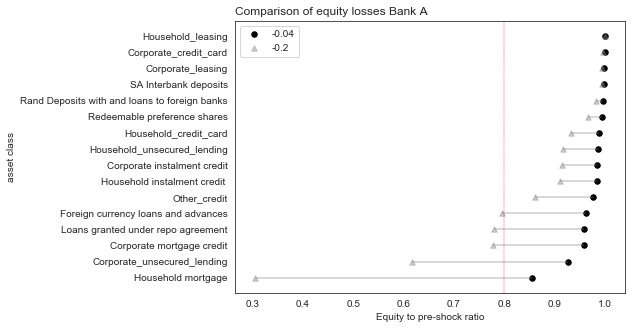

In [194]:
import os
import pandas as pd
 
results2_system = []
results2_agents = []
temp=[]
p=os.getcwd()+'/output/2020-2/' 
for dir, sub, files in os.walk(p):
    for f in files:
        if 'AGENTS' in f:
            agents=pd.read_csv(str(dir)+'/'+f)
#         if 'all_SYSTEM' in f and 'bigshock'   in f:
#             system=pd.read_csv(str(dir)+'/'+f)  
#be careful with the bank string!
sbsa=agents.filter(like='STANDARD')  
cur=agents.current_step
specs=agents[agents.columns[-5:]] # CAREFUL WITH THE ORDER OF THE COLUMNS 
sbsa_all=pd.concat([sbsa,specs,cur],axis=1)

stressedbank= sbsa_all#sbsa_all[sbsa_all.current_step<=3]
stressedbank['assets_to_pre_shock'] = stressedbank['total_assets STANDARDBANK']/  stressedbank['total_assets STANDARDBANK'][0]
stressedbank['equity_to_pre_shock'] = stressedbank['equity STANDARDBANK']/  stressedbank['equity STANDARDBANK'][0]

shocks = [-0.1, -0.5]
shocks =[-0.04, -0.12, -0.2] #  -0.32,  -0.4
assets = ['m_2','m_3',"m_4","m_5","m_6","m_7","m_8", 'm_9','m_10',"m_11","m_12","m_13","m_14","m_15" ,'m_16','m_17', ]

temp=[]
helper = {} 
for s in shocks:
    for a in assets:
        try:
            df=stressedbank[(stressedbank.shock==s)&(stressedbank.asset==a)]
            helper['time']= df['time'].values[-1] 
            helper['bank'] = 'STANDARDBANK'
            helper['asset'] = a
            helper['shock'] = s
            helper['losses'] = df['equity_to_pre_shock'].values[-1] 
            d=pd.DataFrame(helper , index=[a])
            temp.append(d)
#             print(a,s)
        except:
            print(a,s)
#         temp.append(d)
s=pd.concat(temp) 
t=s[['asset','losses','shock']]
r = t.pivot_table('losses', ['asset'], 'shock')

df=r.reset_index()

old_labels = ['m_2','m_3',"m_4","m_5","m_6","m_7","m_8",
                'm_9','m_10',"m_11","m_12","m_13","m_14","m_15" ,'m_16',
                'm_17', ]
 
    
new_labels=["SA Interbank deposits", "Rand Deposits with and loans to foreign banks",
            "Loans granted under repo agreement",
            "Foreign currency loans and advances",
            "Redeemable preference shares",
            "Corporate instalment credit",
            "Household instalment credit ",
            "Corporate mortgage credit",
            "Household mortgage",
            "Corporate_credit_card",
            "Household_credit_card",
            "Corporate_leasing",
            "Household_leasing",
            "Corporate_unsecured_lending",
            "Household_unsecured_lending",
           "Other_credit"]
new_dict = dict(zip(old_labels, new_labels))

df['asset'] = df['asset'].map(new_dict)

ordered = df.sort_values(by=shocks[0]) 
range_df=range(1,len(df.index)+1)
 
fig, ax=plt.subplots(figsize=(7,5))

plt.hlines(y=range_df, xmin=ordered[shocks[0]], xmax=ordered[shocks[-1]], color='grey', alpha=0.4)
plt.scatter(ordered[shocks[0]], range_df, s=30,marker='o', color='black', alpha=1, label=str(shocks[0]))
plt.scatter(ordered[shocks[-1]], range_df,s=30, marker='^', color='grey', alpha=0.4 , label=str(shocks[-1]))
plt.legend()
plt.axvline( x=.80,  linewidth=0.4, color='r', linestyle='--') #ymin=0.025, ymax=0.075 ,

# Change only ax 
# scale_x = 1e6
# ticks_x = ticker.FuncFormatter(lambda x, pos: '${0:g}m$'.format(x/scale_x))
# ax.xaxis.set_major_formatter(ticks_x)

# Add title and axis names
plt.yticks(range_df, ordered['asset'])
plt.title("Comparison of equity losses Bank A ", loc='left')
plt.xlabel('Equity to pre-shock ratio')
plt.ylabel('asset class')

In [239]:
import os
import pandas as pd

import matplotlib.pyplot as plt
plt.rc('font',**{'family':'sans-serif','sans-serif':['Times New Roman']})

results2_system = []
results2_agents = []
temp=[]
p=os.getcwd()+'/output/2020-2/' 
for dir, sub, files in os.walk(p):
    for f in files:
        if 'banks' in f:
            agents=pd.read_csv(str(dir)+'/'+f)
#         if 'all_SYSTEM' in f and 'bigshock'   in f:
#             system=pd.read_csv(str(dir)+'/'+f)  
#be careful with the bank string!
sbsa=agents.filter(like='STANDARD')  
cur=agents.current_step
specs=agents[agents.columns[-5:]] # CAREFUL WITH THE ORDER OF THE COLUMNS 
sbsa_all=pd.concat([sbsa,specs,cur],axis=1)

stressedbank= sbsa_all#sbsa_all[sbsa_all.current_step<=3]
stressedbank['assets_to_pre_shock'] = stressedbank['total_assets STANDARDBANK']/  stressedbank['total_assets STANDARDBANK'][0]
stressedbank['equity_to_pre_shock'] = stressedbank['equity STANDARDBANK']/  stressedbank['equity STANDARDBANK'][0]

shocks = [-0.1, -0.5]
# shocks =[   -0.12,     -0.4]
assets = ['m_10' ,'m_3',"m_4","m_5","m_6","m_7","m_8", 'm_9','m_10',"m_11","m_12","m_13","m_14","m_15" ,'m_16','m_17']





temp=[]
helper = {} 
for s in shocks:
    for a in assets:
        try:
            df=stressedbank[(stressedbank.shock==s)&(stressedbank.asset==a)]
            df['relative_eq_losses']=df.equity_to_pre_shock.diff()
            helper['losses']=df[(df.current_step > 1)].relative_eq_losses.sum()
#           helper['losses'] = df['equity_to_pre_shock'].values[-1] 
            helper['time']= df['time'].values[-1] 
            helper['bank'] = 'STANDARDBANK'
            helper['asset'] = a
            helper['shock'] = s
          
            d=pd.DataFrame(helper , index=[a])
            temp.append(d)
#             print(a,s)
        except:
            print(a,s)
#         temp.append(d)
s=pd.concat(temp) 


/Users/admin/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [200]:
df[(df.current_step > 1)].relative_eq_losses.sum() #(df.current_step > 1) & (df.current_step < 3)
s

-0.062084499645554236

Text(0,0.5,'asset class')

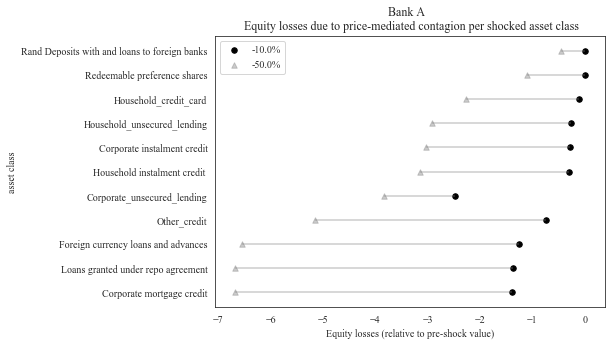

In [240]:
t=s[['asset','losses','shock']]
r = t.pivot_table('losses', ['asset'], 'shock')

df=r.reset_index()

old_labels = ['m_2','m_3',"m_4","m_5","m_6","m_7","m_8",
                'm_9','m_10',"m_11","m_12","m_13","m_14","m_15" ,'m_16',
                'm_17', ]
 
    
new_labels=["SA Interbank deposits", "Rand Deposits with and loans to foreign banks",
            "Loans granted under repo agreement",
            "Foreign currency loans and advances",
            "Redeemable preference shares",
            "Corporate instalment credit",
            "Household instalment credit ",
            "Corporate mortgage credit",
            "Household mortgage",
            "Corporate_credit_card",
            "Household_credit_card",
            "Corporate_leasing",
            "Household_leasing",
            "Corporate_unsecured_lending",
            "Household_unsecured_lending",
           "Other_credit"]
new_dict = dict(zip(old_labels, new_labels))

df['asset'] = df['asset'].map(new_dict)

#drop zeros

df=df[df[ -0.5]!=0]
df[df.columns[-2:]]=df[df.columns[-2:]].multiply(100)

ordered = df.sort_values(by=shocks[1]) 
range_df=range(1,len(df.index)+1)
 
fig, ax=plt.subplots(figsize=(7,5))

plt.hlines(y=range_df, xmin=ordered[shocks[0]], xmax=ordered[shocks[-1]], color='grey', alpha=0.4)
plt.scatter(ordered[shocks[0]], range_df, s=30,marker='o', color='black', alpha=1, label=str(shocks[0]*100)+"%")
plt.scatter(ordered[shocks[-1]], range_df,s=30, marker='^', color='grey', alpha=0.4 , label=str(shocks[-1]*100)+"%")
plt.legend()
#plt.axvline( x=.80,  linewidth=0.4, color='r', linestyle='--') #ymin=0.025, ymax=0.075 ,

# Change only ax 
# scale_x = 1e6
# ticks_x = ticker.FuncFormatter(lambda x, pos: '${0:g}m$'.format(x/scale_x))
# ax.xaxis.set_major_formatter(ticks_x)

# Add title and axis names
plt.yticks(range_df, ordered['asset'])
plt.title("Bank A  \n Equity losses due to price-mediated contagion per shocked asset class", loc='center')
plt.xlabel('Equity losses (relative to pre-shock value)')
plt.ylabel('asset class')

/Users/admin/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0,0.5,'asset class')

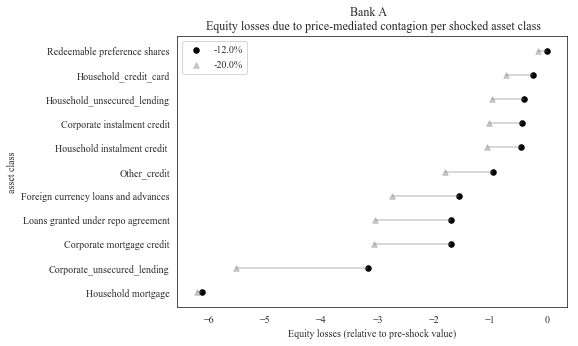

In [238]:
import os
import pandas as pd

sns.set_style("white")
import matplotlib.pyplot as plt
# Only Standard bank! 
plt.rc('font',**{'family':'sans-serif','sans-serif':['Times New Roman']})


 
results2_system = []
results2_agents = []
temp=[]
p=os.getcwd()+'/output/2020-2/' 
for dir, sub, files in os.walk(p):
    for f in files:
        if 'AGENT' in f:
            agents=pd.read_csv(str(dir)+'/'+f)
#         if 'all_SYSTEM' in f and 'bigshock'   in f:
#             system=pd.read_csv(str(dir)+'/'+f)  
#be careful with the bank string!
sbsa=agents.filter(like='STANDARD')  
cur=agents.current_step
specs=agents[agents.columns[-5:]] # CAREFUL WITH THE ORDER OF THE COLUMNS 
sbsa_all=pd.concat([sbsa,specs,cur],axis=1)

stressedbank= sbsa_all#sbsa_all[sbsa_all.current_step<=3]
stressedbank['assets_to_pre_shock'] = stressedbank['total_assets STANDARDBANK']/  stressedbank['total_assets STANDARDBANK'][0]
stressedbank['equity_to_pre_shock'] = stressedbank['equity STANDARDBANK']/  stressedbank['equity STANDARDBANK'][0]

shocks = [-0.1, -0.5]
shocks =[   -0.12,     -0.2]
assets = ['m_10' ,'m_3',"m_4","m_5","m_6","m_7","m_8", 'm_9','m_10',"m_11","m_12","m_13","m_14","m_15" ,'m_16','m_17']


temp=[]
helper = {} 
for s in shocks:
    for a in assets:
        try:
            df=stressedbank[(stressedbank.shock==s)&(stressedbank.asset==a)]
            df['relative_eq_losses']=df.equity_to_pre_shock.diff()
            helper['losses']=df[(df.current_step > 1)].relative_eq_losses.sum()
#           helper['losses'] = df['equity_to_pre_shock'].values[-1] 
            helper['time']= df['time'].values[-1] 
            helper['bank'] = 'STANDARDBANK'
            helper['asset'] = a
            helper['shock'] = s
          
            d=pd.DataFrame(helper , index=[a])
            temp.append(d)
#             print(a,s)
        except:
            print(a,s)
#         temp.append(d)
s=pd.concat(temp) 
df[df.columns[-2:]]=df[df.columns[-2:]].multiply(100)

t=s[['asset','losses','shock']]
r = t.pivot_table('losses', ['asset'], 'shock')

df=r.reset_index()

old_labels = ['m_2','m_3',"m_4","m_5","m_6","m_7","m_8",
                'm_9','m_10',"m_11","m_12","m_13","m_14","m_15" ,'m_16',
                'm_17', ]
 
    
new_labels=["SA Interbank deposits", "Rand Deposits with and loans to foreign banks",
            "Loans granted under repo agreement",
            "Foreign currency loans and advances",
            "Redeemable preference shares",
            "Corporate instalment credit",
            "Household instalment credit ",
            "Corporate mortgage credit",
            "Household mortgage",
            "Corporate_credit_card",
            "Household_credit_card",
            "Corporate_leasing",
            "Household_leasing",
            "Corporate_unsecured_lending",
            "Household_unsecured_lending",
           "Other_credit"]
new_dict = dict(zip(old_labels, new_labels))

df['asset'] = df['asset'].map(new_dict)

#drop zeros

df=df[df[shocks[-1]]!=0]
df[df.columns[-2:]]=df[df.columns[-2:]].multiply(100)

ordered = df.sort_values(by=shocks[1]) 
range_df=range(1,len(df.index)+1)
 
fig, ax=plt.subplots(figsize=(7,5))

plt.hlines(y=range_df, xmin=ordered[shocks[0]], xmax=ordered[shocks[-1]], color='grey', alpha=0.4)
plt.scatter(ordered[shocks[0]], range_df, s=30,marker='o', color='black', alpha=1, label=str(shocks[0]*100)+"%")
plt.scatter(ordered[shocks[-1]], range_df,s=30, marker='^', color='grey', alpha=0.4 , label=str(shocks[-1]*100)+"%")
plt.legend()
#plt.axvline( x=.80,  linewidth=0.4, color='r', linestyle='--') #ymin=0.025, ymax=0.075 ,

# Change only ax 
# scale_x = 1e6
# ticks_x = ticker.FuncFormatter(lambda x, pos: '${0:g}m$'.format(x/scale_x))
# ax.xaxis.set_major_formatter(ticks_x)

# Add title and axis names
plt.yticks(range_df, ordered['asset'])
plt.title("Bank A  \n Equity losses due to price-mediated contagion per shocked asset class", loc='center')
plt.xlabel('Equity losses (relative to pre-shock value)')
plt.ylabel('asset class') 